## ME 592X: Data Analytics and Machine Learning for Cyber-Physical Systems

##### Homework 3  Mohammad Rashid Mohammad Shoaib, Jacob Bergfeld, Melika Tajipour     4/11/2023

### Engineering Image Analysis - Sequential Autoencoder

In [2]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt

In [3]:
transformer=transforms.Compose([
    transforms.Resize((250,100)),
    transforms.Grayscale(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [4]:
train_path='C:/Users/mbshoa/OneDrive - Emerson/Desktop/ME 592/combustion/train'
test_path='C:/Users/mbshoa/OneDrive - Emerson/Desktop/ME 592/combustion/test'

In [5]:
# hyperparameters
learning_rate = 1e-3
num_epochs = 10
batch_size = 32

In [6]:
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=batch_size, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=batch_size, shuffle=True
)

In [7]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [8]:
print(classes)

['stable', 'unstable']


In [9]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        # N, 1, 250, 100
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), # -> N, 16, 125, 50
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=1, padding=1), # -> N, 32, 125, 50
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=1, padding=1) # -> N, 64, 125, 50
        )
        
        # N , 64, 125, 50
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=1, padding=1), # -> N, 32, 125, 50
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=1, padding=1), # N, 16, 125, 50
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 250, 100
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate, 
                             weight_decay=1e-5)

In [11]:
# Point to training
outputs = []
for epoch in range(num_epochs):
    for (img, _) in train_loader:
        #img = img.reshape(-1, 250*100) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.4477
Epoch:2, Loss:0.4945
Epoch:3, Loss:0.4617
Epoch:4, Loss:0.4885
Epoch:5, Loss:0.4952
Epoch:6, Loss:0.4924
Epoch:7, Loss:0.4395
Epoch:8, Loss:0.4666
Epoch:9, Loss:0.4684
Epoch:10, Loss:0.4670


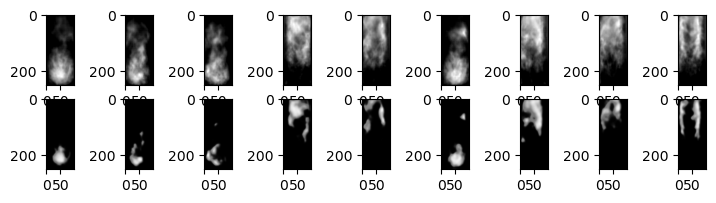

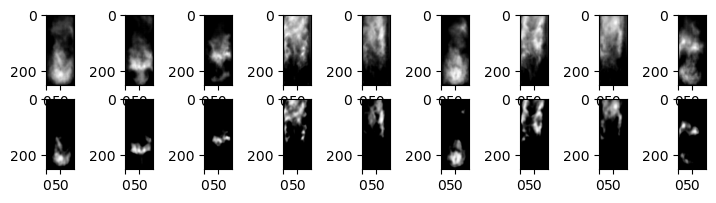

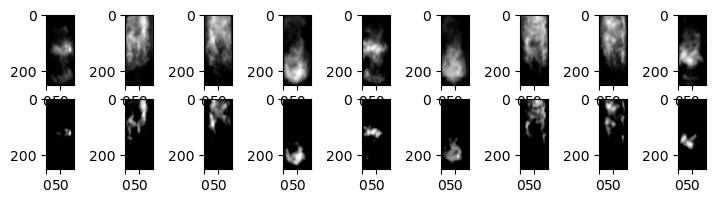

In [12]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        plt.imshow(item[0])

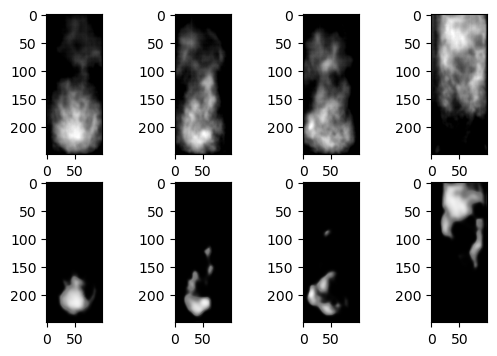

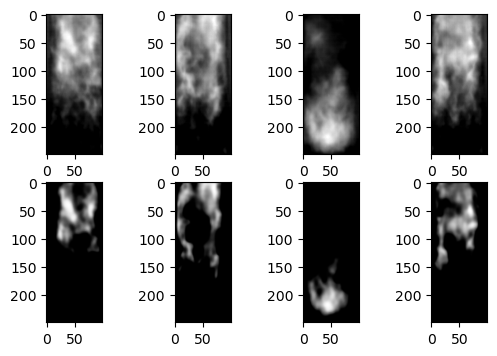

In [19]:
for k in range(0, num_epochs, 6):
    plt.figure(figsize=(8, 4)) # increase figsize to (8, 4)
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 4: break
        plt.subplot(2, 5, i+1)
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 4: break
        plt.subplot(2, 5, 5+i+1) # row_length + i + 1
        plt.imshow(item[0])
